In [ ]:
#HW6 

#Do problems 15.4, 15.6, 15.15, 15.16

Best parameters:  Ridge(alpha=70, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001) 

MSE Mean squared error: 207149.81
r2 Coefficient of determination: 0.44


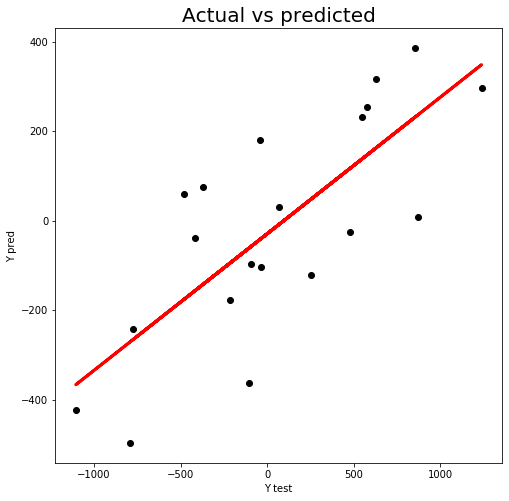

In [6]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X,y = make_regression(n_samples=100,n_features=110,n_informative=105,noise=15.5)
X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# Create linear regression object
ridge = Ridge()
# Train the model using the training sets
parameters = {'alpha':list(np.arange(0,1000,10))}
gs = GridSearchCV(ridge, parameters)
gs.fit(X_train,y_train)
print('Best parameters: ',gs.best_estimator_,'\n')
model = gs.best_estimator_
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("MSE Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("r2 Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test,y_pred)
line = slope*y_test+intercept
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_pred, color="black")
plt.plot(y_test,line,color='red',linewidth=3)
plt.title('Actual vs predicted',fontsize=20)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.xticks()
plt.yticks()
plt.show()

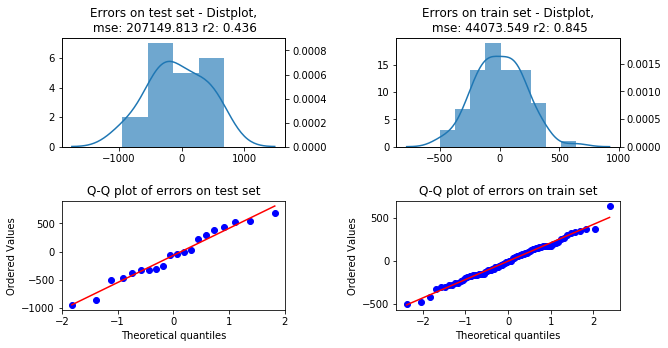

In [7]:
import seaborn as sns
from scipy.stats import norm
from scipy import stats

y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

errors_test = (y_pred_test - y_test)
errors_train = (y_pred_train - y_train)


mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test,y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train,y_pred_train)

plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.title('Errors on test set - Distplot,\n mse: {} r2: {}'.format(round(mse_test,3),round(r2_test,3)))
ax_test = sns.distplot(errors_test, kde=False)
second_ax1 = ax_test.twinx()
sns.distplot(errors_test, ax=second_ax1, kde=True, hist=True)
plt.subplot(2,2,2)
plt.title('Errors on train set - Distplot,\n mse: {} r2: {}'.format(round(mse_train,3),round(r2_train,3)))
ax_train = sns.distplot(errors_train, kde=False)
second_ax2 = ax_train.twinx()
sns.distplot(errors_train, ax=second_ax2, kde=True)
plt.subplot(2,2,3)
res = stats.probplot(errors_test, plot=plt)
plt.title('Q-Q plot of errors on test set')
plt.subplot(2,2,4)
res = stats.probplot(errors_train, plot=plt)
plt.title('Q-Q plot of errors on train set')
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()

# Take the above code sections and put them into classes with inheritence properties.

* Make a class for fitting a regression model (it should have a fit method)
* Make a class for a regression_report that produces all the metrics above into a savable png file image.
* the re

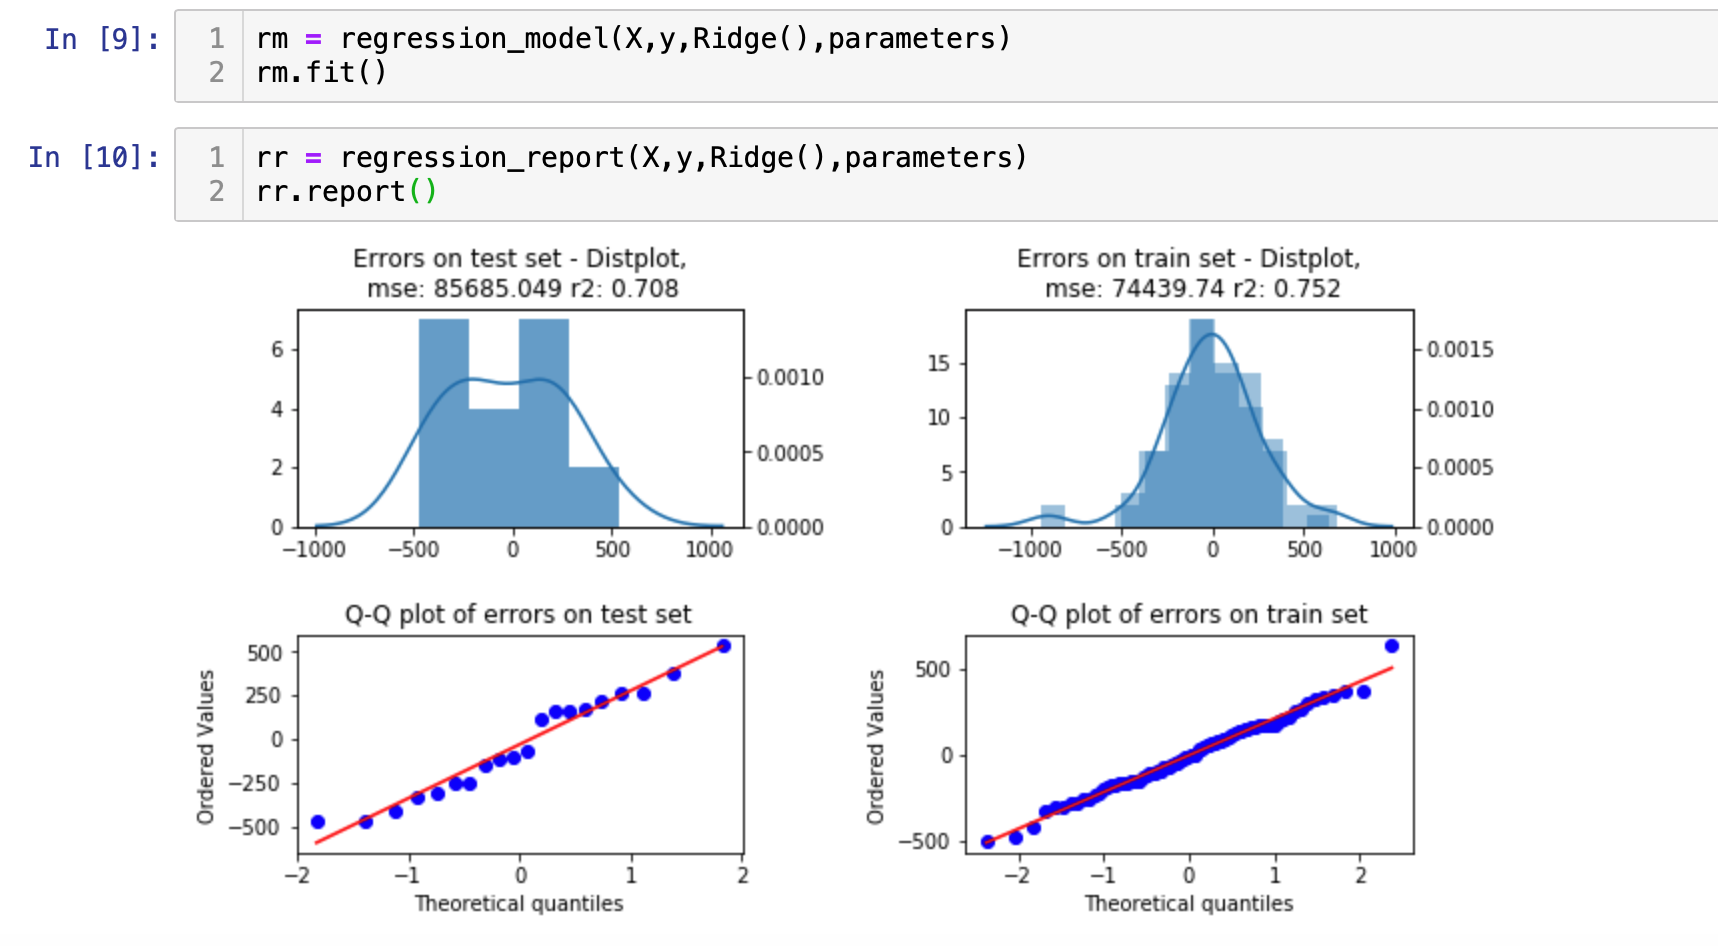